# Learning and Decision Making

## Laboratory 3: Partially observable Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the POMDP problem from the homework and represented in the transition diagram below.

<img src="pomdp.png" width="400px">

Recall that:

* All transitions occur with probability 1 except those from state $A$, where the probabilities are indicated under the edge label.

* At each step, the agent makes an observation corresponding to the letter in the state designation. Such observation occurs with probability 1.

Consider throughout that $\gamma=0.9$.

---

#### Activity 1.        

Implement your POMDP in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* Create a list with all the observations
* For each action, define a `numpy` array with the corresponding transition probabilities;
* For each action, define a `numpy` array with the corresponding observation probabilities;
* Define a `numpy` array with the cost describing the problem.

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [1]:
import numpy as np

# States
A = 0; B1 = 1; B2 = 2; C = 3; D = 4; E = 5; F = 6
X = (A, B1, B2, C, D, E, F)

Pa = np.zeros((7, 7))
Pa[A, B1] = 0.5
Pa[A, B2] = 0.5
Pa[B1, E] = 1
Pa[B2, F] = 1
Pa[C, B1] = 1
Pa[D, B2] = 1
Pa[E, A] = 1
Pa[F, A] = 1

Pb = np.zeros((7, 7))
Pb[A, B1] = 0.5
Pb[A, B2] = 0.5
Pb[B1, F] = 1
Pb[B2, E] = 1
Pb[C, B1] = 1
Pb[D, B2] = 1
Pb[E, A] = 1
Pb[F, A] = 1

Pc = np.zeros((7, 7))
Pc[A, B1] = 0.5
Pc[A, B2] = 0.5
Pc[B1, C] = 1
Pc[B2, D] = 1
Pc[C, B1] = 1
Pc[D, B2] = 1
Pc[E, A] = 1
Pc[F, A] = 1

Ps = [Pa, Pb, Pc]

# Observations
ZA = 0; ZB = 1; ZC = 2; ZD = 3; ZE = 4; ZF = 5
Z = (ZA, ZB, ZC, ZD, ZE, ZF)

Oa = np.zeros((7, 6))
Oa[A, ZA] = 1
Oa[B1, ZB] = 1
Oa[B2, ZB] = 1
Oa[C, ZC] = 1
Oa[D, ZD] = 1
Oa[E, ZE] = 1
Oa[F, ZF] = 1
Oc = Ob = Oa
Os = [Oa, Ob, Oc]

# Actions
a = 0; b = 1; c = 2
A = (a, b, c)

C = np.ones((7, 3))
C[F, (a, b, c)] = 0

GAMMA = 0.9

print("Pa:")
print(Pa)
print("\nPb:")
print(Pb)
print("\nPc:")
print(Pc)
print("\nOa = Ob = Oc:")
print(Oa)
print("\nC:")
print(C)

Pa:
[[0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]]

Pb:
[[0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]]

Pc:
[[0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]]

Oa = Ob = Oc:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

C:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]


### 2. Sampling

You are now going to sample random trajectories of your POMDP and observe the impact it has on the corresponding belief.

---

#### Activity 2.

Generate a random POMDP trajectory using a uniformly random policy. In particular, from a random initial state $x_0$ generate:

1. A sequence of 10,000 states by selecting the actions uniformly at random;
2. The corresponding sequence of 10,000 actions;
3. The corresponding sequence of 10,000 observations.

---

In [2]:
STEPS = 10000

states = np.zeros((STEPS), dtype = np.int8)
actions = np.zeros((STEPS), dtype = np.int8)
observations = np.zeros((STEPS), dtype = np.int8)
currentState = np.random.choice(X)
states[0] = currentState
actions[0] = -1 # "Spawning action"
observations[0] = np.random.choice(Z, p = Oa[currentState])
for i in range(1, STEPS):
    newAction = np.random.choice(A)
    currentState = np.random.choice(X, p = Ps[newAction][currentState])
    newObservation = np.random.choice(Z, p = Oa[currentState])
    states[i] = currentState
    actions[i] = newAction
    observations[i] = newObservation

print("First 10 states:")
print(states[:10])
print("First 10 actions:")
print(actions[:10])
print("First 10 observations:")
print(observations[:10])

First 10 states:
[6 0 1 6 0 1 5 0 1 3]
First 10 actions:
[-1  2  2  1  0  1  0  1  1  2]
First 10 observations:
[5 0 1 5 0 1 4 0 1 2]


---

#### Activity 3.

For the POMDP trajectory generated in Activity 2, compute the corresponding sequence of beliefs, assuming that the agent does not know its initial state. Report the resulting beliefs, ignoring duplicate beliefs or beliefs whose distance is smaller than $10^{-3}$.

**Note 1:** You may want to define a function `belief_update` that receives a belief, an action and an observation and returns the updated belief.

**Note 2:** To compute the distance between vectors, you may find useful `numpy`'s function `linalg.norm`.


---

In [3]:
def belief_update(belief, action, observation):
    newBelief = belief @ Ps[action] @ np.diag(Os[action][:, observation])
    return newBelief / np.sum(newBelief)

beliefs = [np.ones(7) / 7]
belief = beliefs[-1]
for i in range(1, STEPS):
    newBelief = belief_update(belief, actions[i], observations[i])
    if np.linalg.norm(newBelief - belief) > 10**-3:
        beliefs.append(newBelief)
    belief = newBelief

beliefs = np.unique(beliefs, axis=0)
print("Unique beliefs:")
for b in beliefs:
    print(b)

Unique beliefs:
[0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0.]
[0.  0.5 0.5 0.  0.  0.  0. ]
[0. 1. 0. 0. 0. 0. 0.]
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[1. 0. 0. 0. 0. 0. 0.]


### 3. Solution methods

In this section you are going to compare different non-exact solution methods.

---

#### Activity 4

Compute the solution for the underlying MDP and report the corresponding optimal policy and optimal cost-to-go. 

** Note:** You may reuse code from previous labs.

---

In [4]:
# Reused from activity 5 in lab 2

import time

pi = np.ones((len(X), len(A))) / len(A)
quit = False
i = 0

start = time.time()
# Based on slide 35 of lec9.pdf:
while not quit:
    cpi = np.sum([np.diag(pi[:, a]) @ C[:, [a]] for a in range(len(A))], axis=0)
    Ppi = np.sum([np.diag(pi[:, a]) @ Ps[a] for a in range(len(A))], axis=0)
    J = np.linalg.inv(np.eye(len(X)) - GAMMA * Ppi) @ cpi
    Qs = [C[:, [a]] + GAMMA * Ps[a] @ J for a in range(len(A))]
    
    pinew = np.zeros((len(X), len(A)))
    for a in range(len(A)):
        pinew[:, a, None] = np.isclose(Qs[a], np.min(Qs, axis=0), atol=1e-10, rtol=1e-10).astype(int)
    pinew /= np.sum(pinew, axis=1, keepdims = True)
    
    quit = (pinew == pi).all()
    pi = pinew
    i += 1
end = time.time()

print("Optimal policy for the underlying MDP calculated using policy iteration:")
print(pi)
print("\nOptimal cost-to-go for the underlying MDP:")
print(J)
print("\nNumber of iterations:", i)
print("Elapsed time: %g seconds" % (end - start))

Q = np.hstack(Qs)

Optimal policy for the underlying MDP calculated using policy iteration:
[[0.33333333 0.33333333 0.33333333]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

Optimal cost-to-go for the underlying MDP:
[[7.01107011]
 [6.67896679]
 [6.67896679]
 [7.01107011]
 [7.01107011]
 [7.3099631 ]
 [6.3099631 ]]

Number of iterations: 2
Elapsed time: 0.0548236 seconds


---

#### Activity 5

For each of the beliefs computed in Activity 3, compute the action prescribed by:

* The MLS heuristic;
* The AV heuristic;
* The Q-MDP heuristic.

---

In [5]:
As = ("a", "b", "c")

def actions_to_string(actions):
    s = ""
    for a in actions:
        s += As[a] + ", "
    return s[:-2]

def mls(b):
    temp = pi[np.argmax(b)]
    simple = As[np.argmax(temp)]
    all_actions = np.argwhere(temp != 0).flatten()
    return simple, actions_to_string(all_actions)

def av(b):
    temp = b @ pi
    simple = As[np.argmax(temp)]
    all_actions = np.argwhere(temp == np.amax(temp)).flatten()
    return simple, actions_to_string(all_actions)

def qmdp(b):
    simple = As[np.argmin(b @ Q)]
    temp = b @ Q
    all_actions = np.argwhere(temp == np.amin(temp)).flatten()
    return simple, actions_to_string(all_actions)

for b in beliefs:
    mls_a = mls(b)
    av_a = av(b)
    qmdp_a = qmdp(b)
    print("Belief:", b)
    print("\tMLS:\t" + mls_a[0] + "\t(All actions:\t" + mls_a[1] + ")")
    print("\tAV:\t" + av_a[0] + "\t(All actions:\t" + av_a[1] + ")")
    print("\tQ-MDP:\t" + qmdp_a[0] + "\t(All actions:\t" + qmdp_a[1] + ")")

Belief: [0. 0. 0. 0. 0. 0. 1.]
	MLS:	a	(All actions:	a, b, c)
	AV:	a	(All actions:	a, b, c)
	Q-MDP:	a	(All actions:	a, b, c)
Belief: [0. 0. 0. 0. 0. 1. 0.]
	MLS:	a	(All actions:	a, b, c)
	AV:	a	(All actions:	a, b, c)
	Q-MDP:	a	(All actions:	a, b, c)
Belief: [0. 0. 0. 0. 1. 0. 0.]
	MLS:	a	(All actions:	a, b, c)
	AV:	a	(All actions:	a, b, c)
	Q-MDP:	a	(All actions:	a, b, c)
Belief: [0. 0. 0. 1. 0. 0. 0.]
	MLS:	a	(All actions:	a, b, c)
	AV:	a	(All actions:	a, b, c)
	Q-MDP:	a	(All actions:	a, b, c)
Belief: [0. 0. 1. 0. 0. 0. 0.]
	MLS:	a	(All actions:	a)
	AV:	a	(All actions:	a)
	Q-MDP:	a	(All actions:	a)
Belief: [0.  0.5 0.5 0.  0.  0.  0. ]
	MLS:	b	(All actions:	b)
	AV:	a	(All actions:	a, b)
	Q-MDP:	a	(All actions:	a, b)
Belief: [0. 1. 0. 0. 0. 0. 0.]
	MLS:	b	(All actions:	b)
	AV:	b	(All actions:	b)
	Q-MDP:	b	(All actions:	b)
Belief: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
	MLS:	a	(All actions:	a, b, c)
	AV:	a	(All actions:	a, b)
	Q-MDP:	a	(All actio

---

#### Activity 6

Suppose that the optimal cost-to-go function for the POMDP can be represented using the $\alpha$-vectors



$$
\left\{
\begin{bmatrix}
8.39727208 \\
8.70168739 \\
7.80168739 \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.70168739 \\
7.80168739 \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.70168739 \\
7.80168739 \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.39727208 \\
7.80168739 \\
8.70168739 \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
7.80168739 \\
8.70168739 \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
7.80168739 \\
8.70168739 \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.39727208 \\
8.2192667  \\
8.2192667  \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.2192667  \\
8.2192667  \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.2192667  \\
8.2192667  \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},\right\}$$

where the first 3 vectors correspond to action $a$, the middle three vectors correspond to action $b$ and the last 3 vectors correspond to action $c$. Using the $\alpha$-vectors above, 

* Represent the the optimal cost-to-go function for all beliefs of the form $\mathbf{b}=[0, \epsilon, 1-\epsilon, 0, 0, 0, 0]$, with $\epsilon\in[0,1]$. 
* Compare the optimal policy with the MDP heuristics from Activity 5 in the beliefs computed in Activity 3.

** Note: ** Don't forget to import `matplotlib`, and use the magic `%matplotlib notebook`.

---

Optimal cost-to-go function for all beliefs of the form b=[0, 𝜖, 1-𝜖, 0, 0, 0, 0], with 𝜖 ∈ [0,1]:


<IPython.core.display.Javascript object>


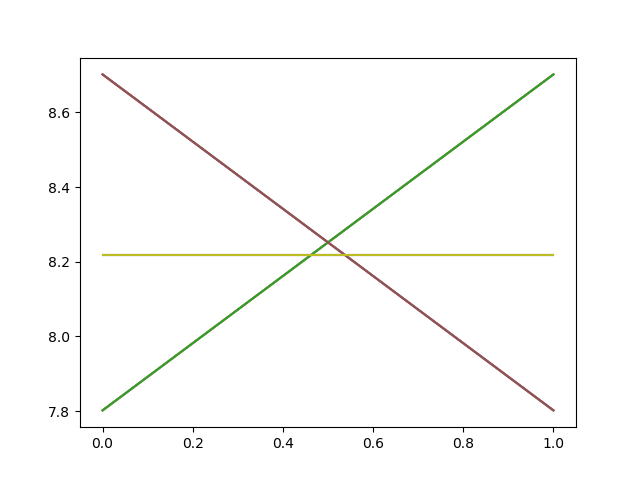

Optimal policy for the beliefs computed in Activity 3 of the form b=[0, 𝜖, 1-𝜖, 0, 0, 0, 0], with 𝜖 ∈ [0,1]:
Belief: [0. 0. 1. 0. 0. 0. 0.]
	Action: a
Belief: [0.  0.5 0.5 0.  0.  0.  0. ]
	Action: c
Belief: [0. 1. 0. 0. 0. 0. 0.]
	Action: b


In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

a1 = np.array([8.39727208, 8.70168739, 7.80168739, 8.39727208, 8.39727208, 8.55748144, 7.55748144])
a2 = np.array([8.42645332, 8.70168739, 7.80168739, 8.02145332, 8.83145332, 8.55748144, 7.55748144])
a3 = np.array([8.42645332, 8.70168739, 7.80168739, 8.83145332, 8.02145332, 8.55748144, 7.55748144])
b1 = np.array([8.39727208, 7.80168739, 8.70168739, 8.39727208, 8.39727208, 8.55748144, 7.55748144])
b2 = np.array([8.42645332, 7.80168739, 8.70168739, 8.02145332, 8.83145332, 8.55748144, 7.55748144])
b3 = np.array([8.42645332, 7.80168739, 8.70168739, 8.83145332, 8.02145332, 8.55748144, 7.55748144])
c1 = np.array([8.39727208, 8.2192667 , 8.2192667 , 8.39727208, 8.39727208, 8.55748144, 7.55748144])
c2 = np.array([8.42645332, 8.2192667 , 8.2192667 , 8.02145332, 8.83145332, 8.55748144, 7.55748144])
c3 = np.array([8.42645332, 8.2192667 , 8.2192667 , 8.83145332, 8.02145332, 8.55748144, 7.55748144])
alphas = np.array((a1, a2, a3, b1, b2, b3, c1, c2, c3))

print("Optimal cost-to-go function for all beliefs of the form b=[0, 𝜖, 1-𝜖, 0, 0, 0, 0], with 𝜖 ∈ [0,1]:")
b = np.array([[0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0]])
points = b @ alphas.T
plt.plot(points)
plt.show()

print("Optimal policy for the beliefs computed in Activity 3 of the form b=[0, 𝜖, 1-𝜖, 0, 0, 0, 0], with 𝜖 ∈ [0,1]:")
bs = []
for b in beliefs:
    if b[0] == 0 and np.all(b[3:] == 0):
        bs.append(b)

for b in bs:
    to_min = np.zeros(len(alphas))
    for i, a in enumerate(alphas):
        to_min[i] = b @ a
    action = As[np.argmin(to_min) // 3]
    print("Belief:", b)
    print("\tAction:", action)

(Only comparing beliefs of the form $\mathbf{b}=[0, \epsilon, 1-\epsilon, 0, 0, 0, 0]$, with $\epsilon\in[0,1]$)

Compared to activity 5, for the beliefs [0. 0. 1. 0. 0. 0. 0.] and [0. 1. 0. 0. 0. 0. 0.] the prescribed actions are the same as the optimal action (a and b, respectively) for all three heuristics, indicating some effectiveness in them.

However, for the belief [0.  0.5 0.5 0.  0.  0.  0. ] no heuristic prescribes the optimal action c, prescribing instead actions a and b (AV and Q-MDP) or only b (MLS).

This shows that while heuristics can prescribe the optimal action for some beliefs, they can't do so consistently.